# Deformation Data Processing and Analyzing

Deformation Data was aquired from COMET and came prepreprocessed as .csv files

The packages we used are below:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs

## Processing time series data

Used pd.todatetime to extract the dates and then also extracted the years to help make the x-axis of the scatter plot.

In [2]:
time_series = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_ts.csv')

time_series['date'] = pd.to_datetime(time_series['date'])

# Extract years from the 'date' column
years = time_series['date'].dt.year

year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


Plot displacement over time, change ticks on the x-axis for clarity

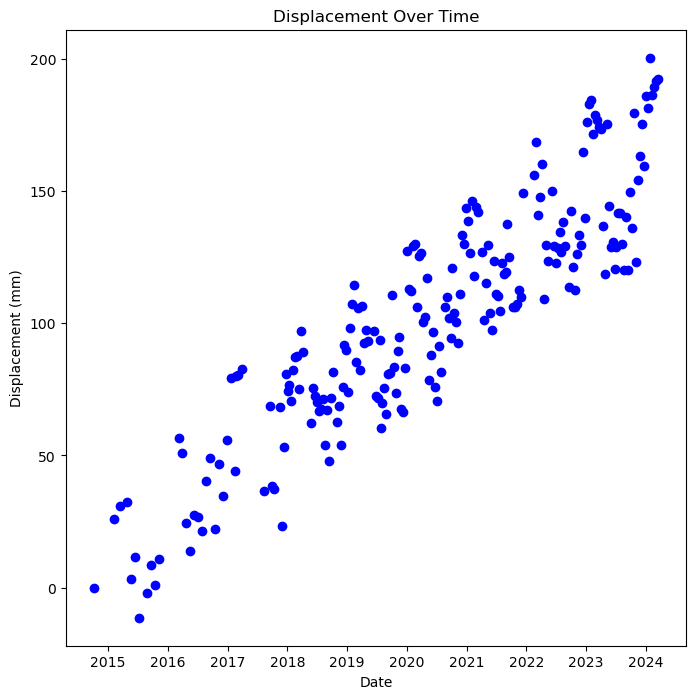

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ts = ax.scatter(time_series['date'], time_series["displacement (mm)"], color='b')
plt.xticks(year, labels=year)
plt.xlabel('Date')
plt.ylabel('Displacement (mm)')
plt.title('Displacement Over Time')

plt.savefig('../figures/displacementTimeSeries.png')

The displacement increases over the years as Sabancaya continues to erupt

### Plot the elevation/displacement data vs the distance from the selected area.

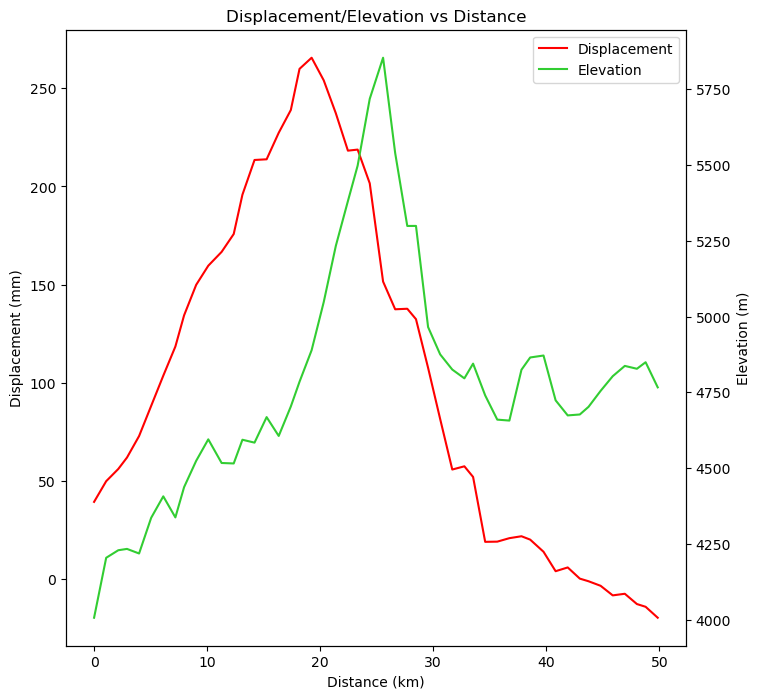

In [4]:
profile = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_profile.csv')
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.plot(profile['distance (km)'], profile["displacement (mm)"], label='Displacement', color='r')
plt.xlabel('Distance (km)')
plt.ylabel('Displacement (mm)')
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Elevation (m)')
ax2.plot(profile['distance (km)'], profile["elevation (m)"], label='Elevation', color='limegreen')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)
plt.title('Displacement/Elevation vs Distance')

plt.savefig('../figures/displacementProfile.png')

A spike in displacement can be seen around 15-20 km away from the selected area close to, but not at, the highest point of elevation.

### Load the seismic and deformation map data and plot it

In [5]:
surface_plot = pd.read_csv('../data/sabancaya_047A_10580_131313_x100_disp_raw.csv')

long = surface_plot['longitude']
lat = surface_plot['latitude']

deformation_data = surface_plot.dropna(subset=['displacement (mm)'])
seismic_data = pd.read_csv('../data/sabancaya/deformation-data/refined-seismic.csv')


caldera_long = [-71.85742, -71.85771, -71.85789, -71.85758, -71.85657, -71.85481, -71.85465, -71.85414, -71.85681, -71.85566, -71.85467]
caldera_lat = [-15.78748, -15.78691, -15.78622, -15.78542, -15.78491, -15.78562, -15.78628, -15.78720, -15.78909, -15.78915, -15.78852]

C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. P

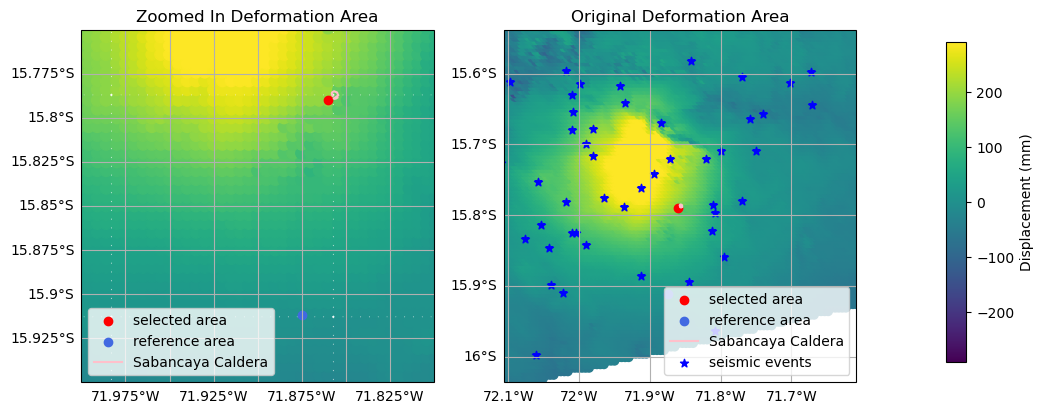

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree()})
# [ax, ax1] = axes.flatten()
#axes[0] = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
vmin = min(deformation_data['displacement (mm)'])
vmax = max(deformation_data['displacement (mm)'])
           
#ax.set_extent([min(long), max(long), min(lat), max(lat)])
axes[0].set_extent([-72, -71.8, -15.95, -15.75])
gridlines = axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines.xlabels_top = False
gridlines.ylabels_right = False


cs = axes[0].scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290, s=70)
selected = axes[0].scatter(-71.86, -15.79, label="selected area", color='red')
reference = axes[0].scatter(-71.875, -15.912, label='reference area', color='royalblue')
caldera = axes[0].plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='pink')
axes[0].legend(loc='lower left')
axes[0].set_title('Zoomed In Deformation Area')
# Add a colorbar
#cbar = plt.colorbar(cs, label = 'Displacement (mm)')

#axes[1] = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

           
axes[1].set_extent([min(long), max(long), min(lat), max(lat)])
#ax.set_extent([-72, -71.8, -15.95, -15.75])
gridlines1 = axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines1.xlabels_top = False
gridlines1.ylabels_right = False
cs1 = axes[1].scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290)
axes[1].scatter(-71.86, -15.79, label="selected area", color='red')
axes[1].scatter(-71.875, -15.912, label='reference area', color='royalblue')
axes[1].plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='pink')
ss = axes[1].scatter(seismic_data['longitude'], seismic_data['latitude'], marker='*', color='blue', label='seismic events')
# Add a colorbar
cax = fig.add_axes([0.99, 0.3, 0.02, 0.4])
cbar = plt.colorbar(cs1, cax=cax, label = 'Displacement (mm)')
axes[1].legend()
axes[1].set_title('Original Deformation Area')

plt.savefig('../figures/deformationCBAR.png', bbox_inches='tight')



The area with the most amount of deformation appears to be located northwest of the caldera and selected area. The seismic events seem to occur mostly outside of the area of deformation. 

C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


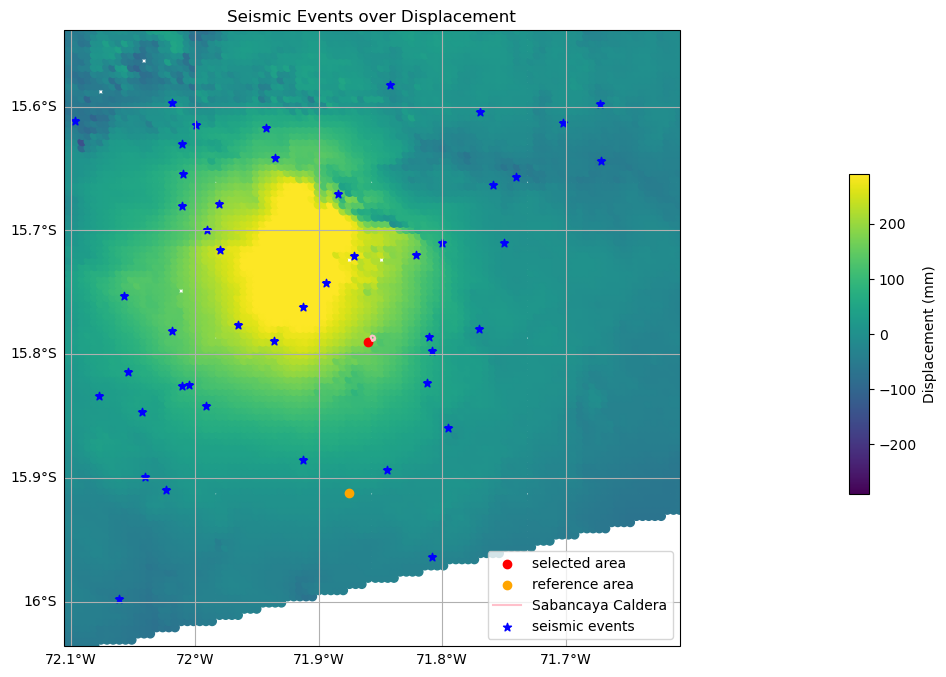

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree()})

axes.set_extent([min(long), max(long), min(lat), max(lat)])
#ax.set_extent([-72, -71.8, -15.95, -15.75])
gridlines1 = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines1.xlabels_top = False
gridlines1.ylabels_right = False
cs1 = axes.scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290)
axes.scatter(-71.86, -15.79, label="selected area", color='red')
axes.scatter(-71.875, -15.912, label='reference area', color='orange')
axes.plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='pink')
ss = axes.scatter(seismic_data['longitude'], seismic_data['latitude'], marker='*', color='blue', label='seismic events')
# Add a colorbar
cax = fig.add_axes([0.99, 0.3, 0.02, 0.4])
cbar = plt.colorbar(cs1, cax=cax, label = 'Displacement (mm)')
axes.legend()
axes.set_title('Seismic Events over Displacement')

plt.savefig('../figures/displacementSeismic.png', bbox_inches='tight')